In [1]:
import numpy as np
import networkx as nx
import tsplib95
import matplotlib.pyplot as plt
import math
import functions as f

In [2]:
problem = tsplib95.load("ch130.tsp")
G  = problem.get_graph()
layout = nx.spring_layout(G,seed=0)
arr=np.array(G.nodes)
np.random.shuffle(arr)

In [3]:
def get_edge_list(array):
    res=[]

    for i in range(len(array)-1):
        res.append((array[i],array[i+1]))

    res.append((array[-1],array[0]))

    return res

def get_distance(node1, node2):
    return math.dist(node1['coord'],node2['coord'])

def get_fitness(edge_list):
    fitness=0
    for pair in edge_list:
        fitness += get_distance(G.nodes[pair[0]],G.nodes[pair[1]])
    return fitness

# get_distance(G.nodes[2],G.nodes[2])
edge_list = get_edge_list(arr)
get_fitness(edge_list)


46701.553678520075

In [4]:
print(type(arr))
print(get_edge_list([i[0] for i in edge_list]))

<class 'numpy.ndarray'>
[(98, 101), (101, 88), (88, 117), (117, 47), (47, 111), (111, 112), (112, 84), (84, 60), (60, 9), (9, 77), (77, 20), (20, 91), (91, 38), (38, 7), (7, 125), (125, 94), (94, 35), (35, 68), (68, 93), (93, 54), (54, 85), (85, 120), (120, 42), (42, 21), (21, 99), (99, 96), (96, 97), (97, 89), (89, 95), (95, 74), (74, 6), (6, 110), (110, 62), (62, 109), (109, 76), (76, 11), (11, 28), (28, 32), (32, 56), (56, 116), (116, 53), (53, 122), (122, 25), (25, 23), (23, 43), (43, 4), (4, 58), (58, 126), (126, 12), (12, 46), (46, 50), (50, 14), (14, 69), (69, 57), (57, 82), (82, 17), (17, 52), (52, 22), (22, 104), (104, 80), (80, 79), (79, 67), (67, 29), (29, 45), (45, 13), (13, 2), (2, 83), (83, 51), (51, 3), (3, 37), (37, 127), (127, 59), (59, 18), (18, 72), (72, 44), (44, 114), (114, 15), (15, 78), (78, 119), (119, 128), (128, 65), (65, 10), (10, 105), (105, 121), (121, 100), (100, 24), (24, 86), (86, 70), (70, 113), (113, 55), (55, 64), (64, 123), (123, 90), (90, 30), (30, 

In [5]:
dictionary = dict()
G.nodes[1]['coord']
for i in range(1,len(G.nodes)+1):
    dictionary[i] = G.nodes[i]['coord']
# print (dictionary)

Optimal path, Fitness: 6110.86094968039
Closest neighbour path, Fitness: 7525.693376457244


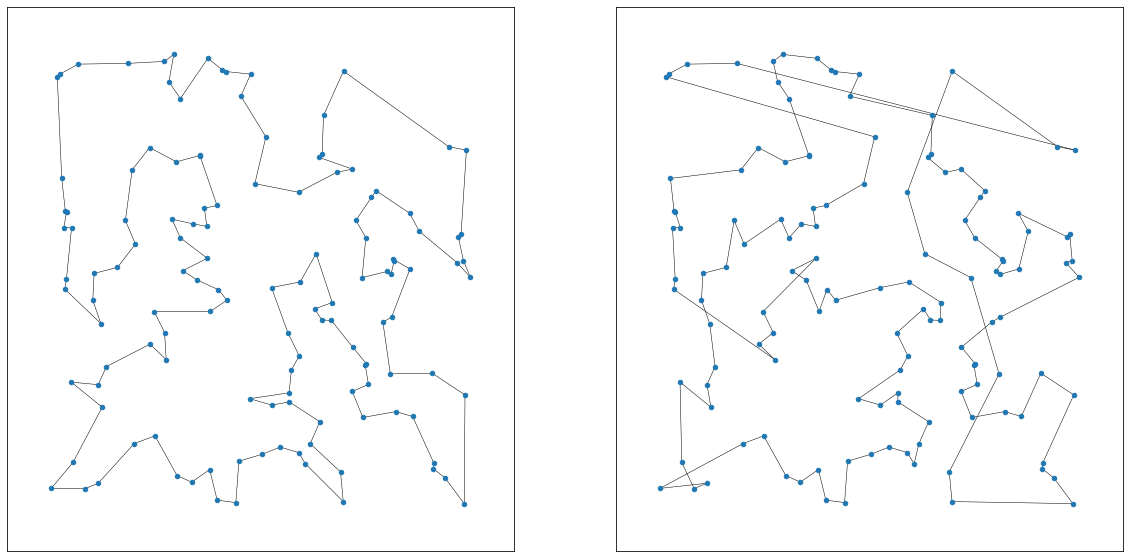

In [6]:
solution = tsplib95.load("ch130.opt.tour").tours[0]
solution = get_edge_list(solution)
fig, axs = plt.subplots(1,2, figsize=(20,10))
fit = str(f.get_fitness(G,solution))
print(f"Optimal path, Fitness: " + fit)
nx.draw_networkx(G, pos=dictionary, with_labels=False, node_size=20, edgelist=[], ax=axs[0], label=fit)
nx.draw_networkx_edges(G, pos=dictionary, width=0.5,edgelist=solution, ax=axs[0], label=fit)


path = f.closest_neighbour_alg(G)
fit = str(f.get_fitness(G,f.get_edge_list(path)))
print(f"Closest neighbour path, Fitness: " + fit)
nx.draw_networkx(G, pos=dictionary, with_labels=False, node_size=20, edgelist=[], ax=axs[1], label=fit)
nx.draw_networkx_edges(G, pos=dictionary, width=0.5,edgelist=f.get_edge_list(path), ax=axs[1], label=fit)
plt.show()

In [7]:
p1 = f.generate_random_inividual(G)
p2 = f.generate_random_inividual(G)

child = f.crossover(p1.get_path(), p2.get_path())

f.plot_figure(G, p1.edge_list,name="parent1.jpg")
f.plot_figure(G, p2.edge_list,name="parent2.jpg")
f.plot_figure(G, f.get_edge_list(child),name="child.jpg")


<Figure size 432x288 with 0 Axes>

In [8]:

# 0 not in [2]
# G.nodes[3]

In [9]:
positions1 = nx.get_node_attributes(G,'coord')
positions2 = f.node_positions(G)
try:
    nx.get_edge_attributes(G,'weight')[(2,1)]
except:
    nx.get_edge_attributes(G,'weight')[(1,2)]


In [10]:
gen = f.generate_random_population(G)
print(gen.individuals)
gen.save_gen()

[<functions.individual object at 0x000001F23A2A0D00>, <functions.individual object at 0x000001F23C77CB20>, <functions.individual object at 0x000001F23A2A1670>, <functions.individual object at 0x000001F23A2A11F0>, <functions.individual object at 0x000001F2294B83D0>, <functions.individual object at 0x000001F23C5C8AC0>, <functions.individual object at 0x000001F22A2F3880>, <functions.individual object at 0x000001F22A2F3FD0>, <functions.individual object at 0x000001F22A2F3F40>, <functions.individual object at 0x000001F22A2F3B20>]


In [14]:
gen2 = f.load_gen()
print(gen2.individuals)
gen.individuals[0].get_path() == gen2.individuals[0].get_path()

[<functions.individual object at 0x000001F23A293730>, <functions.individual object at 0x000001F23CF201C0>, <functions.individual object at 0x000001F23C98E4C0>, <functions.individual object at 0x000001F23C9B1820>, <functions.individual object at 0x000001F23CE71A60>, <functions.individual object at 0x000001F23CE76C40>, <functions.individual object at 0x000001F23CE7FE20>, <functions.individual object at 0x000001F23CE8D040>, <functions.individual object at 0x000001F23CE98220>, <functions.individual object at 0x000001F23CEA3400>]


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,